In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
import matplotlib.patches as patches

In [ ]:
labels = pd.read_csv('/content/full-gt.csv')

## Таблица

In [ ]:
labels

,filename,x_from,y_from,width,height,sign_class,sign_id
0,autosave01_02_2012_09_13_33.jpg,649,376,18,18,2_1,0
1,autosave01_02_2012_09_13_34.jpg,671,356,20,21,2_1,0
2,autosave01_02_2012_09_13_35.jpg,711,332,27,26,2_1,0
3,autosave01_02_2012_09_13_36.jpg,764,290,37,36,2_1,0
4,autosave01_02_2012_09_13_36.jpg,684,384,17,17,1_23,1
...,...,...,...,...,...,...,...
104353,autosave24_10_2013_13_18_37_1.jpg,622,394,27,16,5_15_7,2565
104354,autosave24_10_2013_13_18_37_2.jpg,638,387,31,18,5_15_7,2565
104355,autosave24_10_2013_13_18_38_0.jpg,647,385,33,20,5_15_7,2565
104356,autosave24_10_2013_13_18_38_1.jpg,668,378,41,23,5_15_7,2565


## График распределения кол-ва фотографий на которых присутсивуют данные знаки

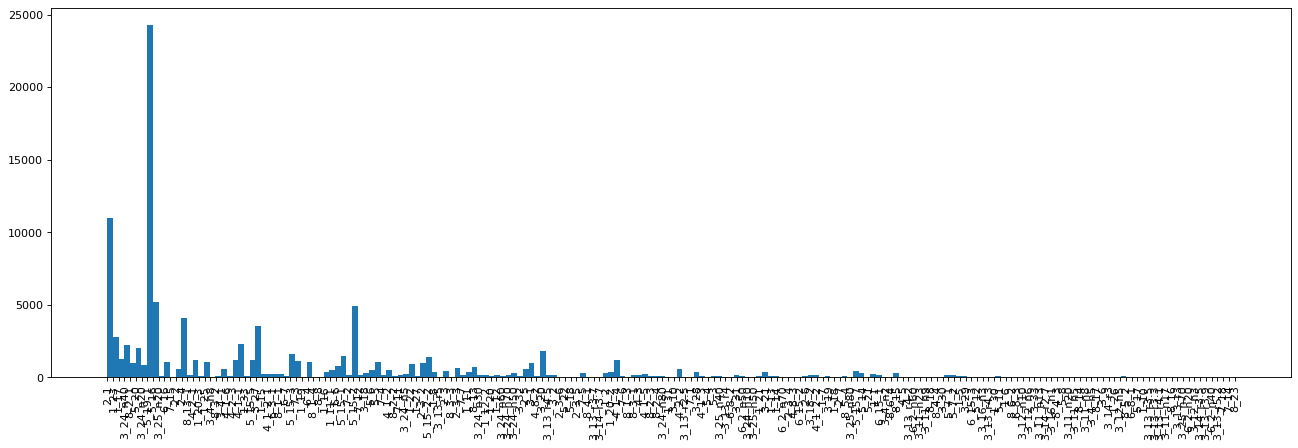

In [ ]:
figure(figsize=(20, 6), dpi=80)
plt.hist(labels.sign_class, bins=198)
plt.xticks(rotation=90)
plt.show()

## Уникальные значения дорожных знаков

In [ ]:
# Уникальные значения классов
labels_unique = labels.sign_class.unique()
labels_unique

array(['2_1', '1_23', '1_17', '3_24_n40', '8_2_1', '5_20', '3_24_n20',
       '5_19_1', '5_16', '3_25_n20', '6_16', '7_15', '2_2', '2_4',
       '8_13_1', '4_2_1', '1_20_3', '1_25', '3_4_n8', '8_3_2', '3_4_1',
       '4_1_6', '4_2_3', '4_1_1', '1_33', '5_15_5', '3_27', '1_15',
       '4_1_2_1', '6_3_1', '8_1_1', '6_7', '5_15_3', '7_3', '1_19', '6_4',
       '8_1_4', '8_8', '1_16', '1_11_1', '6_6', '5_15_1', '7_2', '5_15_2',
       '7_12', '3_18', '5_6', '5_5', '7_4', '4_1_2', '8_2_2', '7_11',
       '3_24_n5', '1_22', '1_27', '2_3_2', '5_15_2_2', '1_8', '3_13_r5',
       '2_3', '8_3_3', '2_3_3', '7_7', '1_11', '8_13', '3_24_n30',
       '1_12_2', '1_20', '1_12', '3_24_n60', '3_24_n70', '3_24_n50',
       '3_32', '2_5', '3_1', '4_8_2', '3_20', '3_13_r4.5', '3_2', '2_3_6',
       '5_22', '5_18', '2_3_5', '7_5', '8_4_1', '3_13_r3.7', '3_14_r3.7',
       '1_2', '1_20_2', '4_1_4', '7_6', '8_1_3', '8_3_1', '4_3', '4_1_5',
       '8_2_3', '8_2_4', '3_24_n80', '1_31', '3_10', '4_2_2', '3_13_r2

## Статистика по уникальным значениям

In [ ]:
# Статистика по уникальным значениям
labels.sign_class.describe()

count     104358
unique       198
top       5_19_1
freq       24264
Name: sign_class, dtype: object

In [ ]:
labels.loc[labels['sign_class'] == '5_19_1']

,filename,x_from,y_from,width,height,sign_class,sign_id
32,autosave01_02_2012_09_13_54.jpg,668,379,17,16,5_19_1,9
34,autosave01_02_2012_09_13_54.jpg,374,405,17,17,5_19_1,11
35,autosave01_02_2012_09_13_55.jpg,688,375,19,19,5_19_1,9
37,autosave01_02_2012_09_13_55.jpg,357,405,17,17,5_19_1,11
38,autosave01_02_2012_09_13_57.jpg,739,347,27,28,5_19_1,9
...,...,...,...,...,...,...,...
104276,autosave24_10_2013_13_17_39_2.jpg,782,382,23,22,5_19_1,2547
104277,autosave24_10_2013_13_17_39_2.jpg,110,394,23,22,5_19_1,2548
104278,autosave24_10_2013_13_17_39_3.jpg,822,372,25,25,5_19_1,2547
104279,autosave24_10_2013_13_17_39_3.jpg,57,386,26,24,5_19_1,2548


Наиболее частовстречаемый класс - **5_19_1**. Всего различных классов дорожных знаков в нашем датасете - **198**. Как видно из подсчетов элементов в каждом классе и из графиков ниже, довольно много классов с очень маленьким количеством фотографий.

Это говорит о том, что данный знак очень распрастраненный и присутсивует на большинстве фотографий

# Данные по классам

In [ ]:
df = pd.DataFrame(labels, columns=['sign_class'])
df['count'] = 1
df_new = df.groupby('sign_class').count().sort_values('count')
df_new.reset_index(inplace= True )
df_new

,sign_class,count
0,3_13_r3.3,1
1,2_3_5,1
2,3_33,1
3,3_13_r5.2,2
4,3_13_r3.7,2
...,...,...
193,2_4,4095
194,5_15_2,4944
195,5_16,5172
196,2_1,10961


In [ ]:
# Уникальные значения кол-ва фотографий по каждому знаку
count_unique = df_new['count'].unique()
count_unique

array([    1,     2,     3,     4,     5,     6,     8,     9,    10,
          11,    12,    13,    14,    15,    16,    18,    19,    20,
          21,    22,    24,    25,    26,    32,    34,    35,    36,
          42,    43,    45,    51,    55,    57,    58,    61,    68,
          71,    72,    74,    75,    81,    83,    85,    87,    88,
          90,    93,    96,    98,    99,   101,   103,   104,   106,
         119,   124,   126,   138,   144,   146,   147,   155,   156,
         158,   160,   164,   165,   174,   175,   176,   178,   180,
         183,   190,   191,   199,   203,   208,   227,   234,   261,
         272,   275,   310,   313,   334,   339,   341,   353,   366,
         384,   385,   432,   437,   473,   477,   533,   543,   544,
         548,   576,   635,   694,   814,   828,   943,   995,   997,
        1007,  1024,  1027,  1054,  1075,  1104,  1166,  1190,  1191,
        1208,  1256,  1390,  1493,  1592,  1803,  2007,  2197,  2333,
        2787,  3558,

## Квантили

In [ ]:
# квантили
df_new['count'].quantile([.25, .5, .75, 1.])

0.25       14.25
0.50       84.00
0.75      310.00
1.00    24264.00
Name: count, dtype: float64

In [ ]:
# среднее значение
df_new['count'].unique().mean()

768.7744360902255

Как видно в 75% случаев кол-во фото - 310шт
Среднее значение 768

## Кол-во фотографий для каждого знака

In [ ]:
for index, row in df_new.iterrows():
  print(index, " = ", row['count'])

3_13_r3.3  =  1
2_3_5  =  1
3_33  =  1
3_13_r5.2  =  2
3_13_r3.7  =  2
3_13_r2.5  =  2
4_5  =  2
8_3_3  =  2
8_16  =  3
8_23  =  3
3_14_r3.7  =  4
8_14  =  4
3_16_n3  =  4
6_15_3  =  4
6_8_1  =  5
3_11_n17  =  5
3_13_r4.2  =  5
3_13_r3.9  =  5
3_25_n70  =  6
3_11_n23  =  6
3_11_n9  =  6
3_25_n80  =  6
6_2_n40  =  6
3_12_n5  =  6
3_13_r4.3  =  6
3_12_n3  =  6
7_18  =  6
3_14_r2.7  =  8
3_4_n2  =  8
2_7  =  8
3_16_n1  =  8
8_4_3  =  8
5_12  =  9
3_13_r5  =  9
7_14  =  9
3_4_n5  =  9
5_17  =  10
1_30  =  11
3_14_r3  =  11
2_3_6  =  11
6_8_3  =  12
1_26  =  13
3_11_n13  =  13
6_8_2  =  13
4_8_3  =  13
2_3_4  =  13
3_12_n6  =  13
5_4  =  14
3_6  =  14
3_14_r3.5  =  14
1_7  =  15
1_6  =  16
3_11_n8  =  16
3_13_r4  =  18
8_17  =  18
3_25_n50  =  18
3_12_n10  =  18
7_15  =  19
1_31  =  19
5_18  =  20
6_2_n70  =  20
1_18  =  20
3_13_r3  =  21
3_13_r3.5  =  21
1_10  =  22
3_11_n20  =  22
3_13_r4.1  =  22
8_8  =  24
3_11_n5  =  24
8_4_4  =  25
8_6_2  =  25
6_2_n60  =  25
8_18  =  25
8_1_3  =  26


In [ ]:
df_new['count'].value_counts()

6        9
13       6
8        5
2        5
18       4
        ..
138      1
126      1
124      1
119      1
24264    1
Name: count, Length: 133, dtype: int64

In [ ]:
df['sign_class'].value_counts()

5_19_1       24264
2_1          10961
5_16          5172
5_15_2        4944
2_4           4095
             ...  
8_3_3            2
3_13_r3.7        2
2_3_5            1
3_33             1
3_13_r3.3        1
Name: sign_class, Length: 198, dtype: int64

# График от самого распространного класса

In [ ]:
grouped_data = labels.groupby('sign_class').size().reset_index(name='count')
grouped_data = grouped_data.sort_values(by='count', ascending=False)
fig = px.bar(grouped_data, x='sign_class' ,y ='count', labels={'sign_class': 'sign_class'}, color_discrete_sequence=['blue'], title=f'Distribution of sign_class')
fig.show()

In [ ]:
df_new.loc[df['count'] == 1]

,sign_class,count
0,3_13_r3.3,1
1,2_3_5,1
2,3_33,1
3,3_13_r5.2,2
4,3_13_r3.7,2
...,...,...
193,2_4,4095
194,5_15_2,4944
195,5_16,5172
196,2_1,10961


# Количество файлов на которых есть знаки без дубликатов

In [ ]:
labels['filename'].drop_duplicates().shape

(59188,)

Как видно в данном датасете из **179139** только на **59188** присутсвуют знаки.
В таблице **labels** представлены **104358** значений, но так как на одной фотографии может быть несколько знаков, то значения имени файла с фотографий **задублированы**.

Для обучения дубликаты самих фотограйий не нужны.